<a href="https://colab.research.google.com/github/Ravi-Poddar26/missing-values/blob/master/H_M_V(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handling Missing Value (1)

always show histplot and plot density after using cca(complete case analysis) remove row or column.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data_url = 'https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day35-complete-case-analysis/data_science_job.csv'
data = pd.read_csv(data_url)
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [4]:
data.isnull().mean()*100

,0
enrollee_id,0.000000
city,0.000000
city_development_index,2.500261
gender,23.530640
relevent_experience,0.000000
enrolled_university,2.014824
education_level,2.401086
major_discipline,14.683161
experience,0.339284
company_size,30.994885


In [5]:
cols = [var for var in data.columns if data[var].isnull().mean()<0.05 and data[var].isnull().mean()>0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [6]:
data[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
2261,0.624,Full time course,Masters,0.0,4.0
11752,0.920,no_enrollment,Primary School,2.0,47.0
18398,0.920,no_enrollment,Graduate,20.0,4.0
12672,0.926,no_enrollment,Phd,20.0,43.0
13947,0.682,no_enrollment,Graduate,20.0,83.0


In [7]:
len(data[cols].dropna()) / len(data)

0.8968577095730244

In [9]:
new_data = data[cols].dropna()
data.shape, new_data.shape

((19158, 13), (17182, 5))

In [10]:
new_data.isnull().mean()

,0
city_development_index,0.0
enrolled_university,0.0
education_level,0.0
experience,0.0
training_hours,0.0


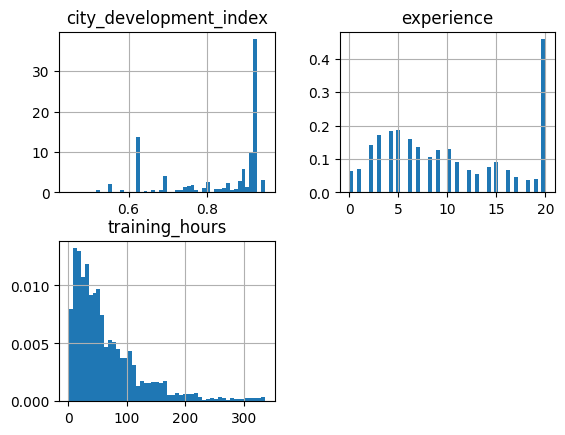

In [12]:
new_data.hist(bins=50, density=True)
plt.show()

<Axes: >

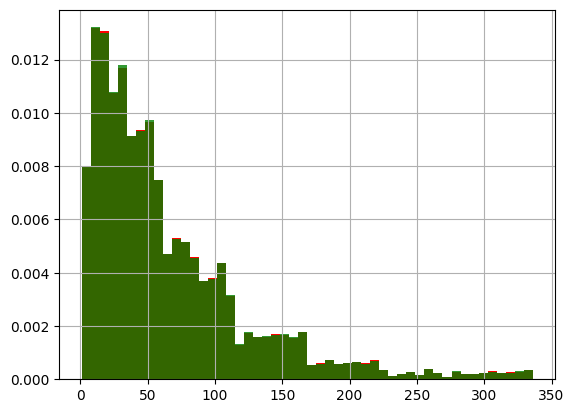

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)

data['training_hours'].hist(bins=50, density=True, color='red')
new_data['training_hours'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)



<Axes: ylabel='Density'>

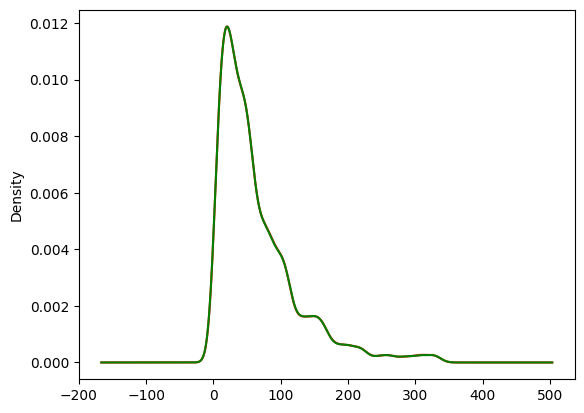

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
data['training_hours'].plot.density(color='red')

# data after cca
new_data['training_hours'].plot.density(color='green')

<Axes: >

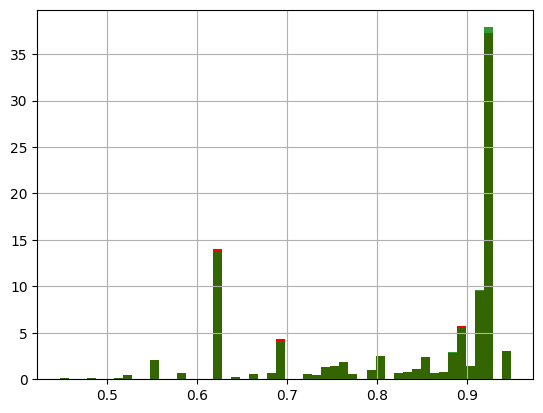

In [21]:

fig = plt.figure()
ax = fig.add_subplot(111)

# original data
data['city_development_index'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_data['city_development_index'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

<Axes: ylabel='Density'>

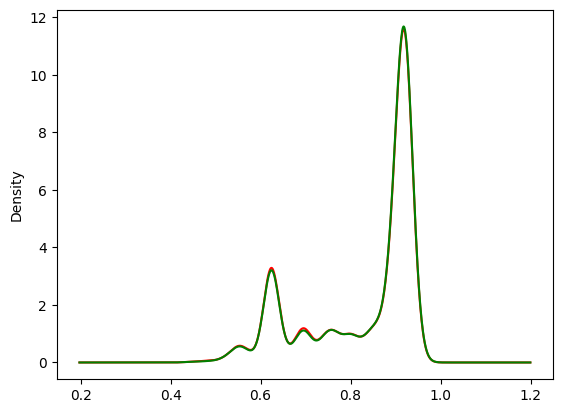

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
data['city_development_index'].plot.density(color='red')

# data after cca
new_data['city_development_index'].plot.density(color='green')

<Axes: >

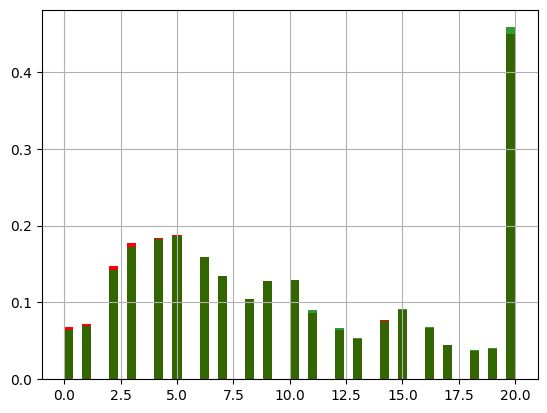

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
data['experience'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_data['experience'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

<Axes: ylabel='Density'>

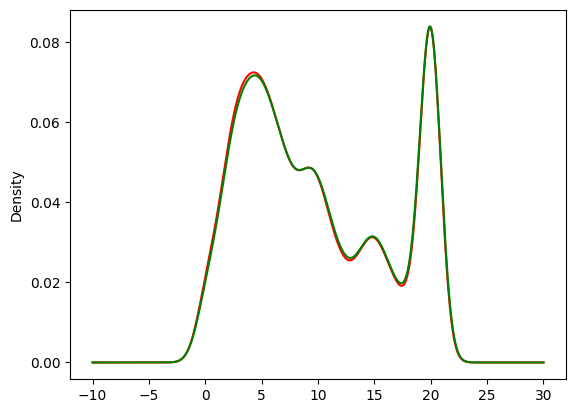

In [24]:

fig = plt.figure()
ax = fig.add_subplot(111)

# original data
data['experience'].plot.density(color='red')

# data after cca
new_data['experience'].plot.density(color='green')

In [26]:
#always see the ratio of value couunt and after value count.
temp = pd.concat([
            # percentage of observations per category, original data
            data['enrolled_university'].value_counts() / len(data),

            # percentage of observations per category, cca data
            new_data['enrolled_university'].value_counts() / len(new_data)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
enrolled_university,,
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [27]:

temp = pd.concat([
            # percentage of observations per category, original data
            data['education_level'].value_counts() / len(data),

            # percentage of observations per category, cca data
            new_data['education_level'].value_counts() / len(new_data)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
education_level,,
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587
